In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
sa=pd.read_csv('Walmart_Sales.csv')

In [3]:
#checking first five rows
sa.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
#describing the dataset
sa.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
#checking info
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
#Checking the shape of the dataset
sa.shape

(6435, 8)

In [7]:
#checking for null values
sa.isnull()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6430,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False
6432,False,False,False,False,False,False,False,False
6433,False,False,False,False,False,False,False,False


In [8]:
#sum of isnull
sa.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
#CHECKING FOR DUPLICATES
sa.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool>

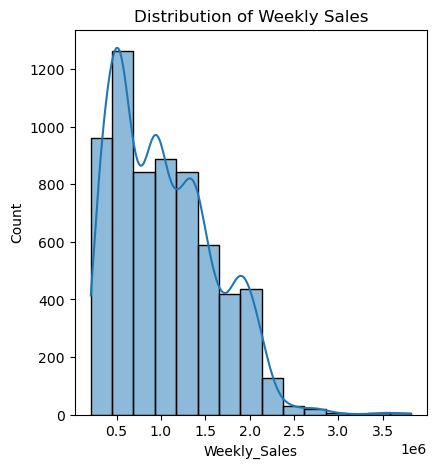

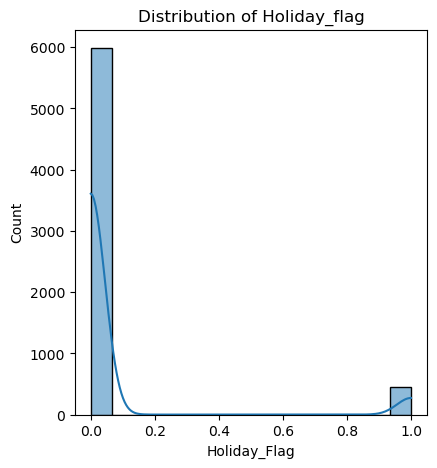

In [10]:
# weekly sales vs holiday flag
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(sa['Weekly_Sales'], bins=15, kde=True)
plt.title('Distribution of Weekly Sales');

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(sa['Holiday_Flag'], bins=15, kde=True)
plt.title('Distribution of Holiday_flag');

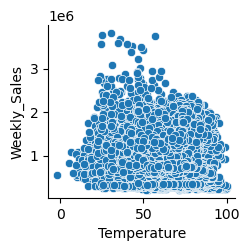

In [11]:
sns.pairplot(sa, x_vars=[ 'Temperature'], 
             y_vars=['Weekly_Sales'], kind='scatter')

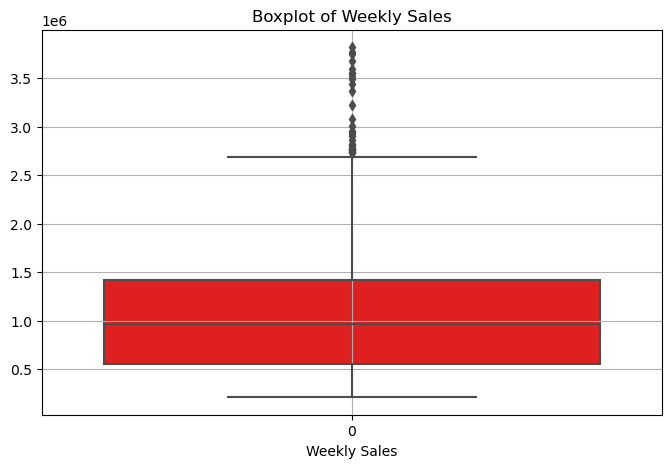

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(sa['Weekly_Sales'], color='Red')
plt.title('Boxplot of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.grid(True)

In [19]:
# droping some features
X = sa.drop(['Weekly_Sales', 'Date'], axis=1)
y = sa['Weekly_Sales']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
#dividing data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                   random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error

rmse1 =np.sqrt(mean_squared_error(y_test, y_pred))
rmse1

529835.5375908588

In [25]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()

In [26]:
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
y_pred2 = model_rf.predict(X_test)
y_pred2

array([ 274988.6613, 1232071.0578,  982808.3122, ..., 1243613.5343,
       1384261.17  ,  400448.6625])

In [28]:
rmse2 =np.sqrt(mean_squared_error(y_test, y_pred2))
rmse2

143926.57548261716